## Học phần: Thị giác máy tính
#### Họ tên: Phạm Phước Bảo Tín
#### Mã sinh viên: 22E1020021

## Mô tả dữ liệu
- Bộ dữ liệu về phân loại "Shoe", "Sandal", "Boot". Nguồn dữ liệu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba lớp 3 thư mục riêng, mỗi thư mục 5000 ảnh.


## Chuẩn bị dữ liệu  + Theo dõi từng k, neen chọn bước nhảy là +2

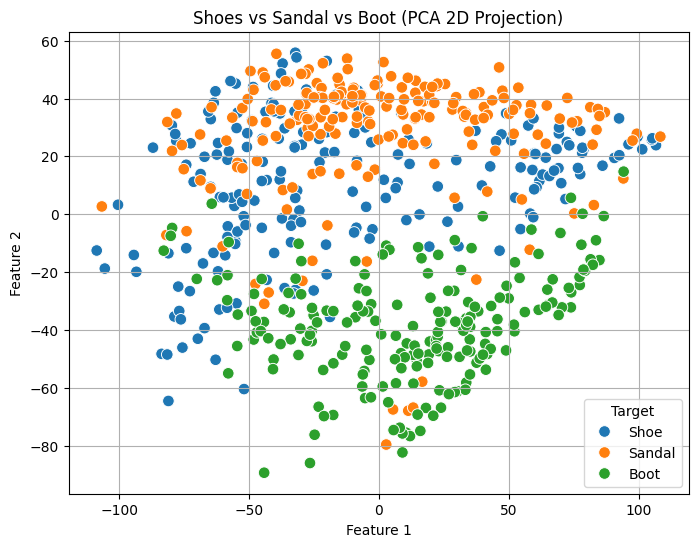

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
# ======================
# 1. Chuẩn bị dữ liệu
# ======================
data_dir = r"D:\datasets\ShoeSandalBoot"
classes = ["Shoe", "Sandal", "Boot"]
  # resize ảnh kích thước 120x120

X = []
y = []

img_size = (120, 120)

for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:200]:  # lấy 200 ảnh cho nhẹ
        img = load_img(os.path.join(folder, img_file), target_size=img_size, color_mode="grayscale")
        arr = img_to_array(img).flatten() / 255.0  # 120*120 = 14400 features
        X.append(arr)
        y.append(c)

X = np.array(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()


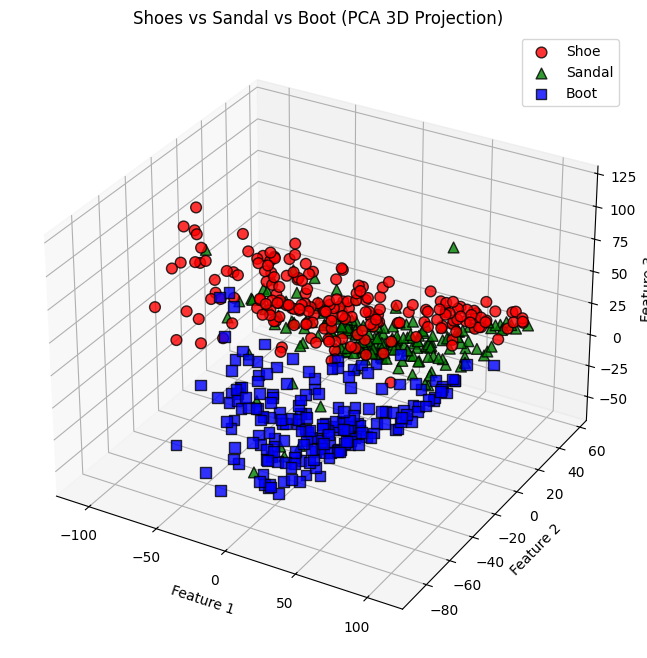

In [2]:
#PCA 3 chiều
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_3d, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', '^', 's', 'D', 'P', 'X', '*']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, target in enumerate(df["Target"].unique()):
    subset = df[df["Target"] == target]
    ax.scatter(
        subset["Feature 1"],
        subset["Feature 2"],
        subset["Feature 3"],
        c=colors[i % len(colors)],       # màu riêng
        marker=markers[i % len(markers)],# marker riêng
        label=target,
        alpha=0.8,                       # trong suốt nhẹ
        s=60,                            # kích thước điểm
        edgecolors='k'                   # viền đen
    )

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Shoes vs Sandal vs Boot (PCA 3D Projection)")
ax.legend()
plt.show()

In [3]:


# ======================
# 2. Chia dữ liệu
# ======================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=40, stratify=y
)

k=1, Accuracy=0.8833
k=3, Accuracy=0.8667
k=5, Accuracy=0.8667
k=7, Accuracy=0.8667
k=9, Accuracy=0.8583


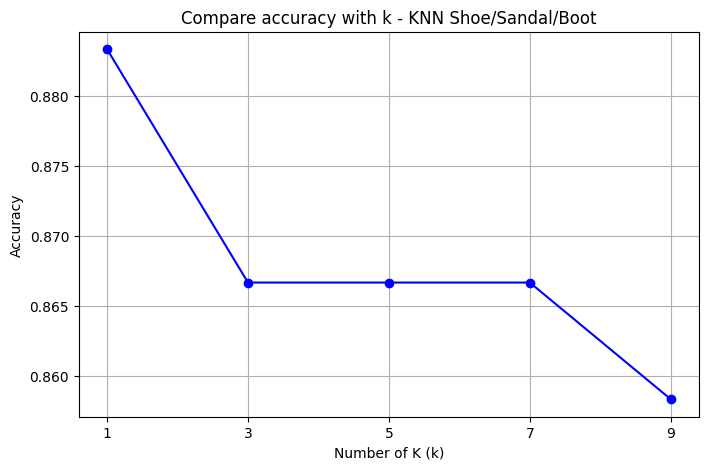

In [5]:
# 3. So sánh accuracy theo k
# ======================
k_values = range(1, 10, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("Number of K (k)")
plt.ylabel("Accuracy")
plt.title("Compare accuracy with k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Chọn k (từ kết quả thử nghiệm trên)

In [6]:
# ======================
# 3. Huấn luyện KNN
# ======================
k=5
knn_k = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_k.fit(X_train, y_train)

# ======================
# 4. Đánh giá mô hình
# ======================
y_pred = knn_k.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



🔹 Accuracy: 0.8666666666666667

🔹 Classification Report:
               precision    recall  f1-score   support

        Shoe       0.83      1.00      0.91        40
      Sandal       0.97      0.70      0.81        40
        Boot       0.84      0.90      0.87        40

    accuracy                           0.87       120
   macro avg       0.88      0.87      0.86       120
weighted avg       0.88      0.87      0.86       120



Vẽ ma trận nhầm lẫn với K đã chọn

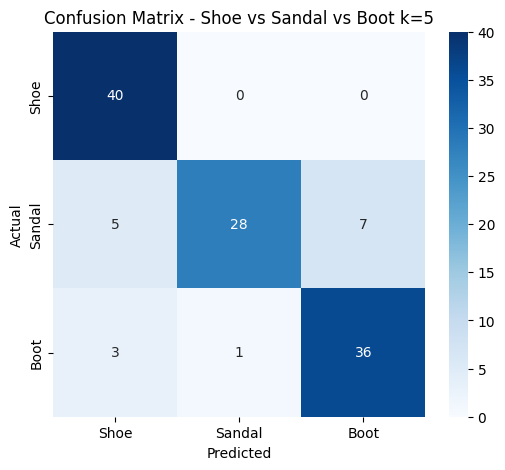

In [7]:
# 5. Ma trận nhầm lẫn
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## Phân loại ảnh thực tế

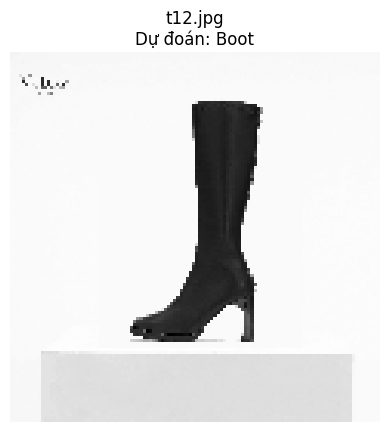

t12.jpg → Boot


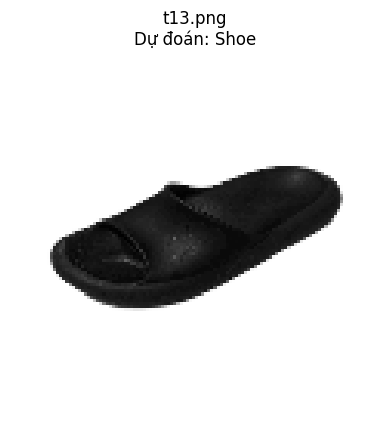

t13.png → Shoe


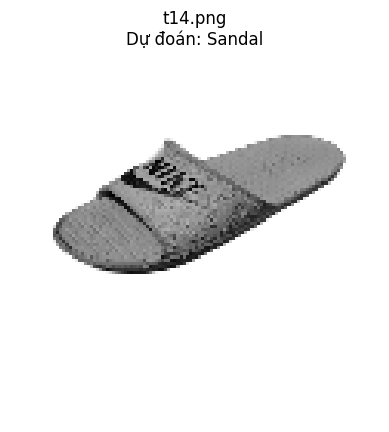

t14.png → Sandal


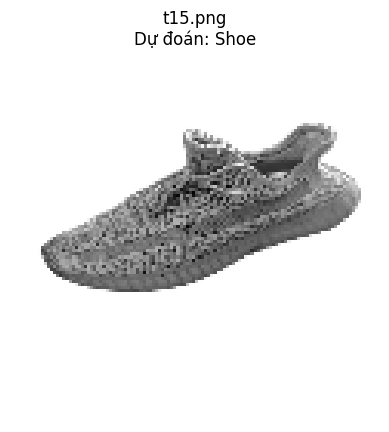

t15.png → Shoe


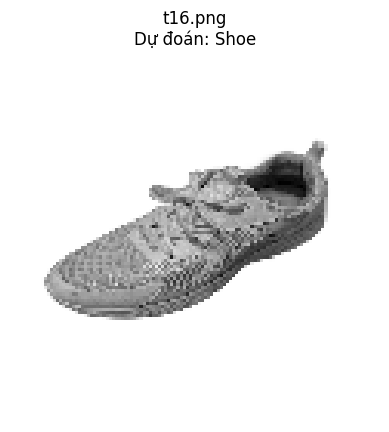

t16.png → Shoe


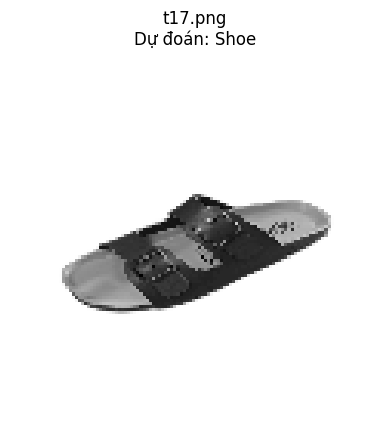

t17.png → Shoe


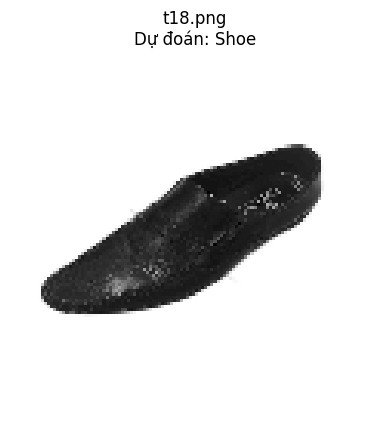

t18.png → Shoe


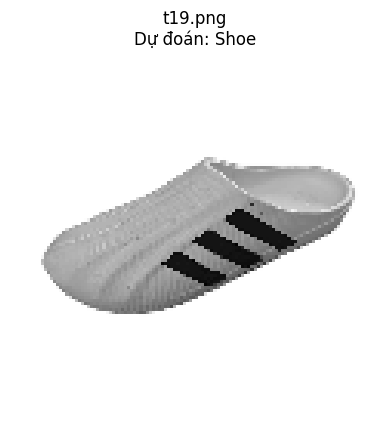

t19.png → Shoe


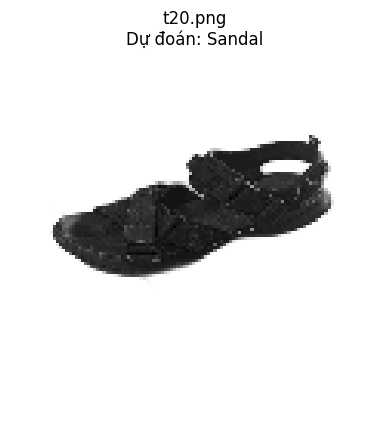

t20.png → Sandal


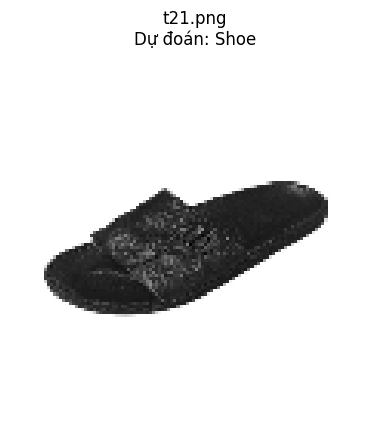

t21.png → Shoe


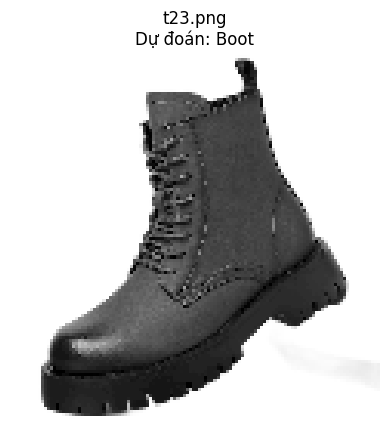

t23.png → Boot


In [9]:
# ======================
# 6. Hàm dự đoán ảnh trong folder
# ======================
def predict_folder(folder_path, limit=None):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # đọc ảnh Gray
        if img is None:
            continue
        img = cv2.resize(img, img_size)                   # (120,120)
        img_flat = img.flatten().reshape(1, -1) / 255.0
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]

        results.append((filename, prediction))

        plt.imshow(img, cmap="gray")
        plt.title(f"{filename}\nDự đoán: {prediction}")
        plt.axis("off")
        plt.show()

        print(f"{filename} → {prediction}")

        count += 1
        if limit and count >= limit:
            break
    
    return results
test_dir = r"D:\datasets\test" 
results = predict_folder(test_dir, limit=16) # hiển thị thử 16 ảnh đầu


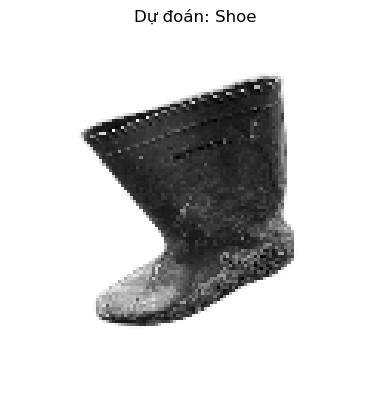

D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png → Shoe


np.str_('Shoe')

In [ ]:

#-------------Hàm dự đoán ảnh mới-------------------
def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # đọc ảnh Gray
    if img is None:
        print(f"Không đọc được ảnh: {img_path}")
        return None
    
    img = cv2.resize(img, img_size)                  # (120,120)
    img_flat = img.flatten().reshape(1, -1) / 255.0
    img_scaled = scaler.transform(img_flat)
    prediction = knn_k.predict(img_scaled)[0]

    plt.imshow(img, cmap="gray")
    plt.title(f"Dự đoán: {prediction}")
    plt.axis("off")
    plt.show()

    print(f"{img_path} → {prediction}")
    return prediction

predict_image(r"D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png")



    